In [55]:
from modules.dataset import SpeechDataset
from modules.down_sample import downsample_to_8k
from modules.low_pass import apply_lowpass_filter
from modules.subsample import subsample
from modules.plot_spectrogram import plot_spectrogram

ImportError: attempted relative import with no known parent package

In [ ]:
# noise_type = "0_air_conditioner"
noise_type = "white"
dataset = SpeechDataset(noise_type=noise_type)

itter = iter(dataset)

noisy, clean = next(itter)

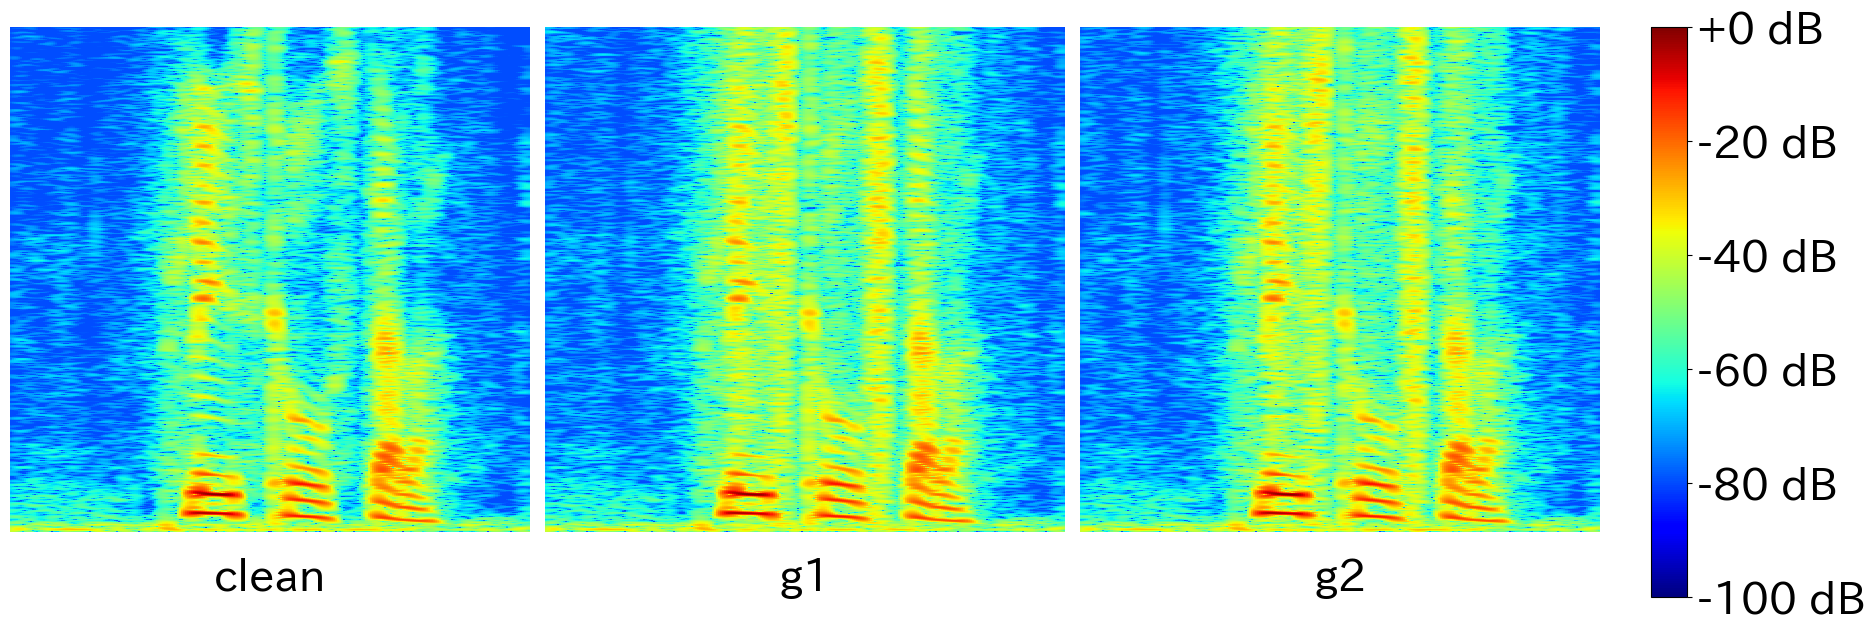

In [ ]:
sample_rate = 8000
original_sample_rate = 16000
k = 2


# y = apply_lowpass_filter(clean)
y = clean
y = downsample_to_8k(y.squeeze(0).numpy(), original_sample_rate)


g1, g2 = subsample(clean, k)
g1 = g1.squeeze(0).detach().cpu().numpy()
g2 = g2.squeeze(0).detach().cpu().numpy()

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
g1 = downsample_to_8k(g1, original_sample_rate//2)
g2 = downsample_to_8k(g2, original_sample_rate//2)

plot_spectrogram(axes[0], y, sample_rate, "clean")
plot_spectrogram(axes[1], g1, sample_rate, "g1")
im = plot_spectrogram(axes[2], g2, sample_rate, "g2")

plt.tight_layout(rect=[0, 0, 0.9, 1])

cbar_height = 1 - 0.05  
cbar_bottom = (1 - cbar_height) / 2 

cbar_ax = fig.add_axes([0.92, cbar_bottom, 0.02, cbar_height])
cbar = fig.colorbar(im, cax=cbar_ax, format="%+2.0f dB")
cbar.ax.tick_params(labelsize=32)

plt.savefig(f"./{noise_type}_noisy_and_subsample_spectrogram.pdf", format="pdf", bbox_inches="tight")
plt.show()
plt.close()